In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.pyplot as plt
import pandas as pd

# Use numpy to convert to arrays
import numpy as np

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
import pmdarima as pm

## pmdarima Requirements

# numpy (1.16.2)
# scipy (1.2.1)
# scikit-learn (0.20.1) 
# pandas (0.23.4
# statsmodels (0.9.0) 
# Cython (0.29.2)
# pmdarima (1.2.1)

In [2]:
# Load the "continental_primary_energy_production.xlsx" Dataset

cont_production_data = pd.read_excel("data/continental_primary_energy_production.xlsx", sheet_name=1)
cont_production_data.head()

,Year,Africa,Asia_Oceania,Central_South_America,Eurasia,Europe,Middle_East,North_America,World
0,1980,17.390004,36.956865,12.132110,61.601755,41.548277,42.264371,83.039701,294.933082
1,1981,15.136668,38.018861,12.334656,61.847971,42.502839,36.485103,83.655152,289.981249
2,1982,15.577230,39.186695,12.214396,63.821935,43.899989,29.694700,84.320265,288.715210
3,1983,16.259108,42.151480,12.491370,65.259866,45.965981,27.563930,81.984396,291.676131
4,1984,17.715109,46.098539,13.523924,68.348303,46.636354,27.676021,87.879676,307.877927


In [3]:
X = cont_production_data['Year']
Y = np.vstack([cont_production_data['Africa'], cont_production_data['Asia_Oceania'], cont_production_data['Central_South_America'], cont_production_data['Eurasia'], cont_production_data['Europe'], cont_production_data['Middle_East'], cont_production_data['North_America'], cont_production_data['World']])

<function matplotlib.pyplot.show(*args, **kw)>

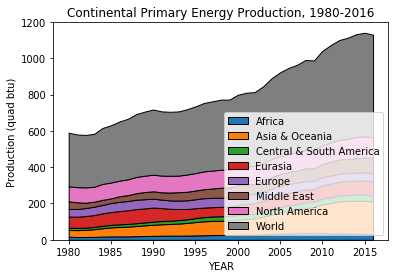

In [4]:
labels = ['Africa', 'Asia & Oceania', 'Central & South America', 'Eurasia', 'Europe', 'Middle East', 'North America', 'World']
plt.stackplot(X, Y, labels=labels, edgecolor='black')
plt.legend(loc=4)

plt.xlabel('YEAR')
plt.ylabel('Production (quad btu)')
plt.title('Continental Primary Energy Production, 1980-2016')

plt.show

In [5]:
# Check if the Africa series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Africa_result = adfuller(cont_production_data.Africa)
print('ADF Statistic: %f' % Africa_result[0])
print('p-value: %f' % Africa_result[1])

ADF Statistic: -2.098810
p-value: 0.244993


In [6]:
Africa_model = pm.auto_arima(cont_production_data.Africa, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Africa_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=115.316, BIC=121.538, Fit time=0.045 seconds
Fit ARIMA: order=(0, 2, 0); AIC=134.852, BIC=137.963, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=114.042, BIC=118.708, Fit time=0.017 seconds
Fit ARIMA: order=(0, 2, 1); AIC=117.446, BIC=122.112, Fit time=0.037 seconds
Fit ARIMA: order=(2, 2, 0); AIC=115.387, BIC=121.609, Fit time=0.028 seconds
Fit ARIMA: order=(2, 2, 1); AIC=115.724, BIC=123.501, Fit time=0.119 seconds
Total fit time: 0.257 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   35
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 -54.021
Method:                       css-mle   S.D. of innovations              1.121
Date:                Sun, 04 Aug 2019   AIC                            114.042
Time:                        00:49:59   BIC                            118.708
Sample:                           

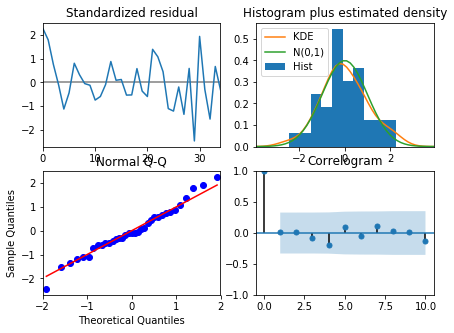

In [7]:
Africa_model.plot_diagnostics(figsize=(7,5))
plt.show()

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


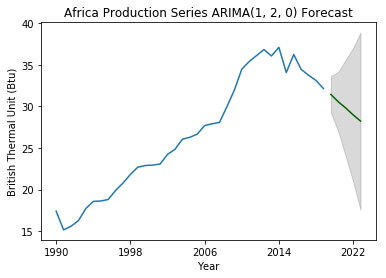

In [8]:
matplotlib.use("agg")
fig = plt.figure()
ax = fig.gca()

# Africa Series  ARIMA(1, 2, 0) Model Forecast
n_periods = 5
fc, confint = Africa_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_production_data.Africa), len(cont_production_data.Africa)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Africa Plot
plt.plot(cont_production_data.Africa)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Africa Production Series ARIMA(1, 2, 0) Forecast")
plt.xlabel("Year")
plt.ylabel("British Thermal Unit (Btu)")

x_formatter = FixedFormatter(["0", "1990", "1998", "2006", "2014", "2022"])
x_locator = FixedLocator([0, 8, 16, 24, 32, 40])
ax.xaxis.set_major_formatter(x_formatter)

plt.show()

In [9]:
# Check if the Asia_Oceania series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Asia_Oceania_result = adfuller(cont_production_data.Africa)
print('ADF Statistic: %f' % Asia_Oceania_result[0])
print('p-value: %f' % Asia_Oceania_result[1])

ADF Statistic: -2.098810
p-value: 0.244993


In [10]:
Asia_Oceania_model = pm.auto_arima(cont_production_data.Asia_Oceania, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Asia_Oceania_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=161.932, BIC=168.153, Fit time=0.039 seconds
Fit ARIMA: order=(0, 2, 0); AIC=158.915, BIC=162.025, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=159.947, BIC=164.613, Fit time=0.021 seconds
Fit ARIMA: order=(0, 2, 1); AIC=159.943, BIC=164.609, Fit time=0.014 seconds
Total fit time: 0.087 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   35
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -77.457
Method:                           css   S.D. of innovations              2.213
Date:                Sun, 04 Aug 2019   AIC                            158.915
Time:                        00:50:11   BIC                            162.025
Sample:                             2   HQIC                           159.988
                                                                              
                 coef    std e

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


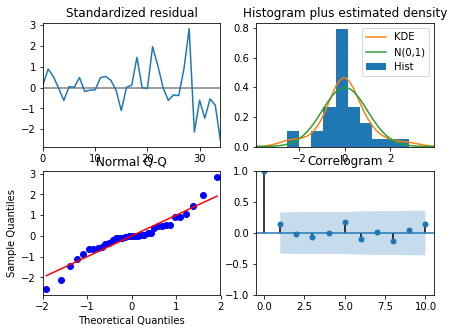

In [11]:
Asia_Oceania_model.plot_diagnostics(figsize=(7,5))
plt.show()

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


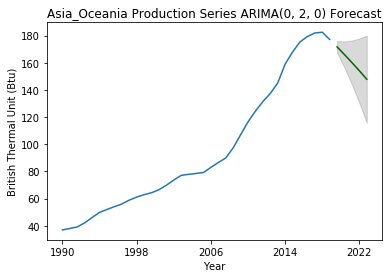

In [12]:
matplotlib.use("agg")
fig = plt.figure()
ax = fig.gca()

# Asia_Oceania Series  ARIMA(0, 2, 0) Model Forecast
n_periods = 5
fc, confint = Asia_Oceania_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_production_data.Asia_Oceania), len(cont_production_data.Asia_Oceania)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Asia_Oceania Plot
plt.plot(cont_production_data.Asia_Oceania)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Asia_Oceania Production Series ARIMA(0, 2, 0) Forecast")
plt.xlabel("Year")
plt.ylabel("British Thermal Unit (Btu)")

x_formatter = FixedFormatter(["0", "1990", "1998", "2006", "2014", "2022"])
x_locator = FixedLocator([0, 8, 16, 24, 32, 40])
ax.xaxis.set_major_formatter(x_formatter)

plt.show()

In [13]:
# Check if the Central_South_America series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Central_South_America_result = adfuller(cont_production_data.Central_South_America)
print('ADF Statistic: %f' % Central_South_America_result[0])
print('p-value: %f' % Central_South_America_result[1])

ADF Statistic: -0.510718
p-value: 0.889908


In [14]:
Central_South_America_model = pm.auto_arima(cont_production_data.Central_South_America, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Central_South_America_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=69.339, BIC=75.561, Fit time=0.090 seconds
Fit ARIMA: order=(0, 2, 0); AIC=81.176, BIC=84.286, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=76.969, BIC=81.635, Fit time=0.013 seconds
Fit ARIMA: order=(0, 2, 1); AIC=68.139, BIC=72.805, Fit time=0.045 seconds
Fit ARIMA: order=(0, 2, 2); AIC=69.249, BIC=75.471, Fit time=0.074 seconds
Fit ARIMA: order=(1, 2, 2); AIC=71.176, BIC=78.953, Fit time=0.129 seconds
Total fit time: 0.362 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   35
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -31.070
Method:                       css-mle   S.D. of innovations              0.559
Date:                Sun, 04 Aug 2019   AIC                             68.139
Time:                        00:50:19   BIC                             72.805
Sample:                             2   HQIC  

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


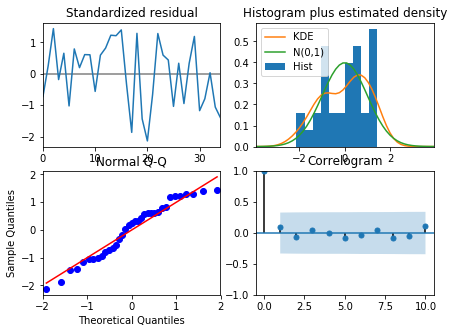

In [15]:
Central_South_America_model.plot_diagnostics(figsize=(7,5))
plt.show()

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


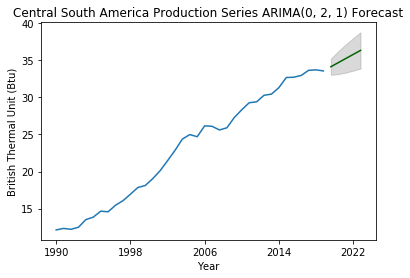

In [16]:
matplotlib.use("agg")
fig = plt.figure()
ax = fig.gca()

# Central_South_America Series  ARIMA(0, 2, 1) Model Forecast
n_periods = 5
fc, confint = Central_South_America_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_production_data.Central_South_America), len(cont_production_data.Central_South_America)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Asia_Oceania Plot
plt.plot(cont_production_data.Central_South_America)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Central South America Production Series ARIMA(0, 2, 1) Forecast")
plt.xlabel("Year")
plt.ylabel("British Thermal Unit (Btu)")

x_formatter = FixedFormatter(["0", "1990", "1998", "2006", "2014", "2022"])
x_locator = FixedLocator([0, 8, 16, 24, 32, 40])
ax.xaxis.set_major_formatter(x_formatter)

plt.show()

In [17]:
# Check if the Eurasia series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Eurasia_result = adfuller(cont_production_data.Eurasia)
print('ADF Statistic: %f' % Eurasia_result[0])
print('p-value: %f' % Eurasia_result[1])

ADF Statistic: -2.477499
p-value: 0.121045


In [18]:
Eurasia_model = pm.auto_arima(cont_production_data.Eurasia, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Eurasia_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=159.881, BIC=166.102, Fit time=0.039 seconds
Fit ARIMA: order=(0, 2, 0); AIC=160.681, BIC=163.792, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=157.893, BIC=162.559, Fit time=0.016 seconds
Fit ARIMA: order=(0, 2, 1); AIC=158.396, BIC=163.062, Fit time=0.012 seconds
Fit ARIMA: order=(2, 2, 0); AIC=159.875, BIC=166.096, Fit time=0.022 seconds
Fit ARIMA: order=(2, 2, 1); AIC=159.615, BIC=167.392, Fit time=0.073 seconds
Total fit time: 0.174 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   35
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 -75.946
Method:                       css-mle   S.D. of innovations              2.115
Date:                Sun, 04 Aug 2019   AIC                            157.893
Time:                        00:50:27   BIC                            162.559
Sample:                           

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


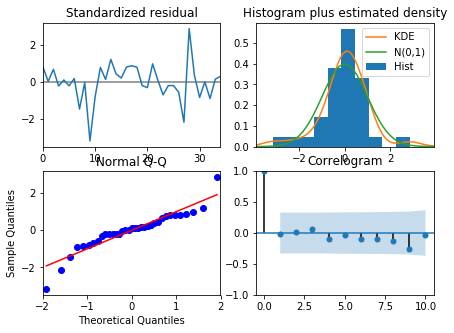

In [19]:
Eurasia_model.plot_diagnostics(figsize=(7,5))
plt.show()

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


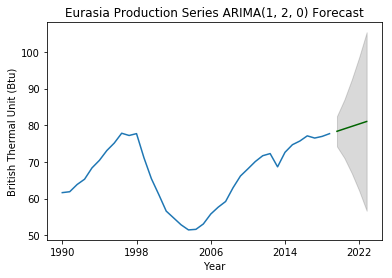

In [20]:
matplotlib.use("agg")
fig = plt.figure()
ax = fig.gca()

# Eurasia Series  ARIMA(1, 2, 0) Model Forecast
n_periods = 5
fc, confint = Eurasia_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_production_data.Eurasia), len(cont_production_data.Eurasia)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Eurasia Plot
plt.plot(cont_production_data.Eurasia)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Eurasia Production Series ARIMA(1, 2, 0) Forecast")
plt.xlabel("Year")
plt.ylabel("British Thermal Unit (Btu)")

x_formatter = FixedFormatter(["0", "1990", "1998", "2006", "2014", "2022"])
x_locator = FixedLocator([0, 8, 16, 24, 32, 40])
ax.xaxis.set_major_formatter(x_formatter)

plt.show()

In [21]:
# Check if the Europe series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Europe_result = adfuller(cont_production_data.Europe)
print('ADF Statistic: %f' % Europe_result[0])
print('p-value: %f' % Europe_result[1])

ADF Statistic: -2.086496
p-value: 0.249979


In [22]:
Europe_model = pm.auto_arima(cont_production_data.Europe, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Europe_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=115.148, BIC=121.369, Fit time=0.043 seconds
Fit ARIMA: order=(0, 2, 0); AIC=120.259, BIC=123.370, Fit time=0.006 seconds
Fit ARIMA: order=(1, 2, 0); AIC=113.189, BIC=117.855, Fit time=0.018 seconds
Fit ARIMA: order=(0, 2, 1); AIC=114.244, BIC=118.910, Fit time=0.018 seconds
Fit ARIMA: order=(2, 2, 0); AIC=115.149, BIC=121.371, Fit time=0.019 seconds
Fit ARIMA: order=(2, 2, 1); AIC=117.148, BIC=124.924, Fit time=0.064 seconds
Total fit time: 0.177 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   35
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 -53.594
Method:                       css-mle   S.D. of innovations              1.115
Date:                Sun, 04 Aug 2019   AIC                            113.189
Time:                        00:50:35   BIC                            117.855
Sample:                           

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


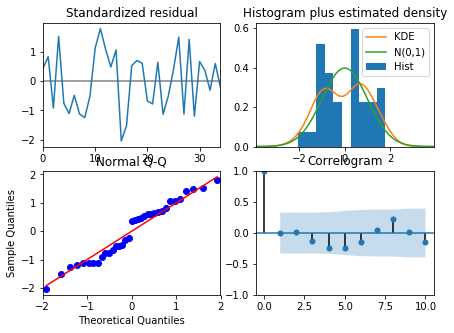

In [23]:
Europe_model.plot_diagnostics(figsize=(7,5))
plt.show()

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


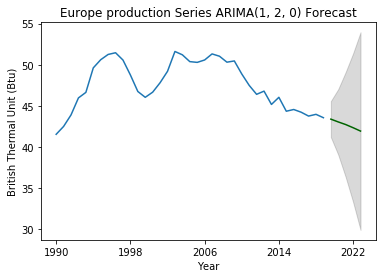

In [24]:
matplotlib.use("agg")
fig = plt.figure()
ax = fig.gca()

# Europe Series  ARIMA(1, 2, 0) Model Forecast
n_periods = 5
fc, confint = Europe_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_production_data.Europe), len(cont_production_data.Europe)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Europe Plot
plt.plot(cont_production_data.Europe)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Europe production Series ARIMA(1, 2, 0) Forecast")
plt.xlabel("Year")
plt.ylabel("British Thermal Unit (Btu)")

x_formatter = FixedFormatter(["0", "1990", "1998", "2006", "2014", "2022"])
x_locator = FixedLocator([0, 8, 16, 24, 32, 40])
ax.xaxis.set_major_formatter(x_formatter)

plt.show()

In [25]:
# Check if the Middle_East series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Middle_East_result = adfuller(cont_production_data.Middle_East)
print('ADF Statistic: %f' % Middle_East_result[0])
print('p-value: %f' % Middle_East_result[1])

ADF Statistic: 1.442066
p-value: 0.997297


In [26]:
Middle_East_model = pm.auto_arima(cont_production_data.Middle_East, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Middle_East_model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=185.336, BIC=191.670, Fit time=0.078 seconds
Fit ARIMA: order=(0, 1, 0); AIC=181.537, BIC=184.704, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=179.693, BIC=184.444, Fit time=0.012 seconds
Fit ARIMA: order=(0, 1, 1); AIC=180.001, BIC=184.751, Fit time=0.011 seconds
Fit ARIMA: order=(2, 1, 0); AIC=181.677, BIC=188.011, Fit time=0.019 seconds
Fit ARIMA: order=(2, 1, 1); AIC=183.117, BIC=191.035, Fit time=0.057 seconds
Total fit time: 0.186 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   36
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -86.847
Method:                       css-mle   S.D. of innovations              2.696
Date:                Sun, 04 Aug 2019   AIC                            179.693
Time:                        00:50:46   BIC                            184.444
Sample:                           

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


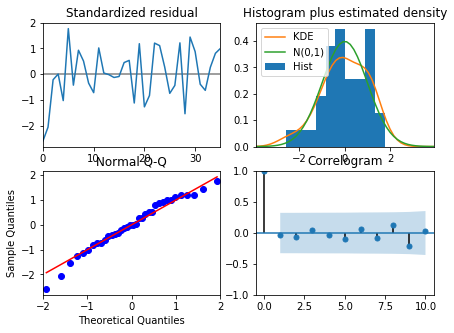

In [27]:
Middle_East_model.plot_diagnostics(figsize=(7,5))
plt.show()

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


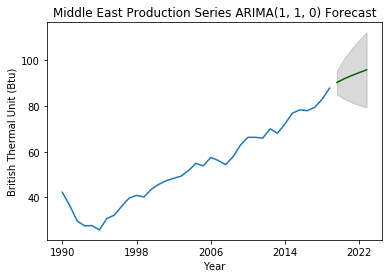

In [28]:
matplotlib.use("agg")
fig = plt.figure()
ax = fig.gca()

# Middle_East Series  ARIMA(1, 1, 0) Model Forecast
n_periods = 5
fc, confint = Middle_East_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_production_data.Middle_East), len(cont_production_data.Middle_East)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Middle_East Plot
plt.plot(cont_production_data.Middle_East)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Middle East Production Series ARIMA(1, 1, 0) Forecast")
plt.xlabel("Year")
plt.ylabel("British Thermal Unit (Btu)")

x_formatter = FixedFormatter(["0", "1990", "1998", "2006", "2014", "2022"])
x_locator = FixedLocator([0, 8, 16, 24, 32, 40])
ax.xaxis.set_major_formatter(x_formatter)

plt.show()

In [29]:
# Check if the North_America series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
North_America_result = adfuller(cont_production_data.North_America)
print('ADF Statistic: %f' % North_America_result[0])
print('p-value: %f' % North_America_result[1])

ADF Statistic: -0.356709
p-value: 0.917080


In [30]:
North_America_model = pm.auto_arima(cont_production_data.North_America, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(North_America_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=176.098, BIC=179.209, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=172.359, BIC=177.025, Fit time=0.016 seconds
Fit ARIMA: order=(0, 2, 1); AIC=159.236, BIC=163.902, Fit time=0.018 seconds
Fit ARIMA: order=(0, 2, 2); AIC=161.215, BIC=167.436, Fit time=0.034 seconds
Fit ARIMA: order=(1, 2, 2); AIC=163.236, BIC=171.013, Fit time=0.124 seconds
Total fit time: 0.214 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   35
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -76.618
Method:                       css-mle   S.D. of innovations              2.052
Date:                Sun, 04 Aug 2019   AIC                            159.236
Time:                        00:50:55   BIC                            163.902
Sample:                             2   HQIC

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


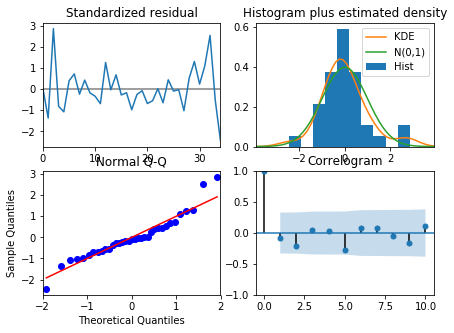

In [31]:
North_America_model.plot_diagnostics(figsize=(7,5))
plt.show()

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


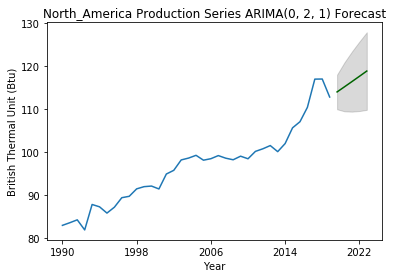

In [32]:
matplotlib.use("agg")
fig = plt.figure()
ax = fig.gca()

# North_America Series  ARIMA(0, 2, 1) Model Forecast
n_periods = 5
fc, confint = North_America_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_production_data.North_America), len(cont_production_data.North_America)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# North_America Plot
plt.plot(cont_production_data.North_America)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("North_America Production Series ARIMA(0, 2, 1) Forecast")
plt.xlabel("Year")
plt.ylabel("British Thermal Unit (Btu)")

x_formatter = FixedFormatter(["0", "1990", "1998", "2006", "2014", "2022"])
x_locator = FixedLocator([0, 8, 16, 24, 32, 40])
ax.xaxis.set_major_formatter(x_formatter)

plt.show()

In [33]:
# Check if the World series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
World_result = adfuller(cont_production_data.World)
print('ADF Statistic: %f' % World_result[0])
print('p-value: %f' % World_result[1])

ADF Statistic: 1.196737
p-value: 0.995963


In [34]:
World_model = pm.auto_arima(cont_production_data.World, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(World_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=246.112, BIC=252.333, Fit time=0.053 seconds
Fit ARIMA: order=(0, 2, 0); AIC=252.109, BIC=255.220, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=248.148, BIC=252.814, Fit time=0.018 seconds
Fit ARIMA: order=(0, 2, 1); AIC=246.934, BIC=251.600, Fit time=0.014 seconds
Fit ARIMA: order=(2, 2, 1); AIC=247.764, BIC=255.541, Fit time=0.048 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 2); AIC=247.227, BIC=256.559, Fit time=0.102 seconds
Total fit time: 0.254 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   35
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -119.056
Method:                       css-mle   S.D. of innovations              6.962
Date:                Sun, 04 Aug 2019   AIC                            246.112
Time:                        00:51:01   BIC   

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


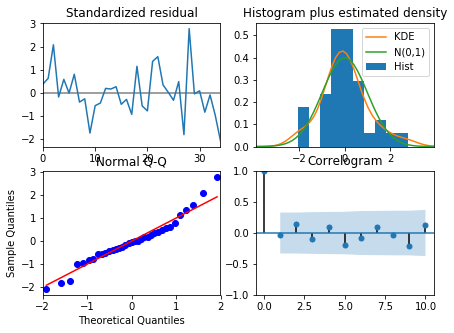

In [35]:
World_model.plot_diagnostics(figsize=(7,5))
plt.show()

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


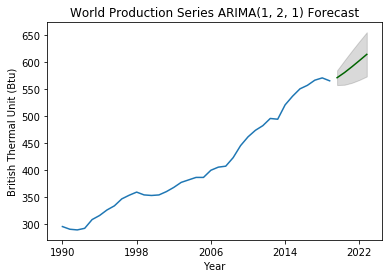

In [36]:
matplotlib.use("agg")
fig = plt.figure()
ax = fig.gca()

# World Series  ARIMA(1, 2, 1) Model Forecast
n_periods = 5
fc, confint = World_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_production_data.World), len(cont_production_data.World)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# World Plot
plt.plot(cont_production_data.World)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("World Production Series ARIMA(1, 2, 1) Forecast")
plt.xlabel("Year")
plt.ylabel("British Thermal Unit (Btu)")

x_formatter = FixedFormatter(["0", "1990", "1998", "2006", "2014", "2022"])
x_locator = FixedLocator([0, 8, 16, 24, 32, 40])
ax.xaxis.set_major_formatter(x_formatter)

plt.show()